In [157]:
import pandas as pd
import numpy as np
import itertools
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import statistics 
from scipy import stats

from scipy.stats import norm
from scipy.stats import expon

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt


In [158]:
df = pd.read_csv('insurance.csv')

In [159]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [162]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:>

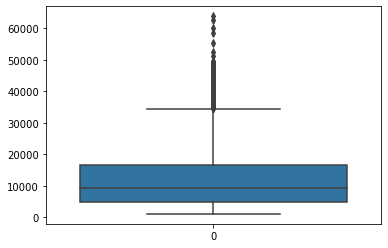

In [163]:
sns.boxplot(data=df.charges)

<AxesSubplot:xlabel='charges', ylabel='sex'>

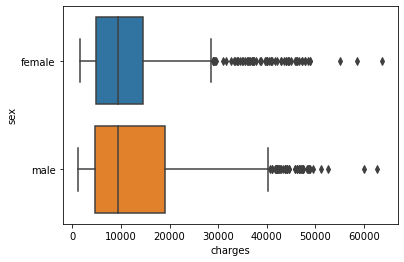

In [164]:
sns.boxplot(x=df.charges, y=df.sex)

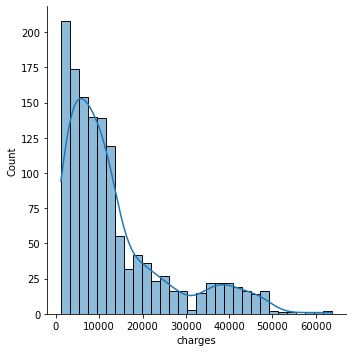

In [165]:
sns.displot(data=df['charges'], kde=True)

<AxesSubplot:>

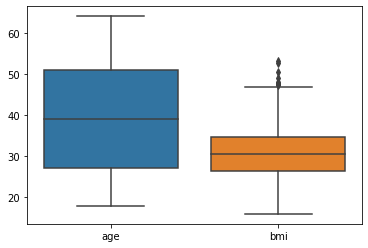

In [166]:
sns.boxplot(data=df[['age','bmi']])

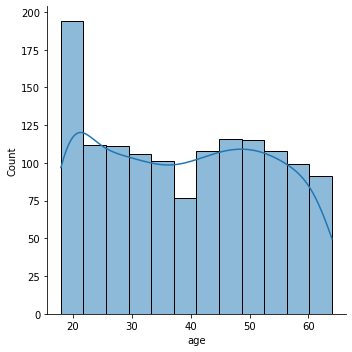

In [167]:
sns.displot(data=df['age'], kde=True)

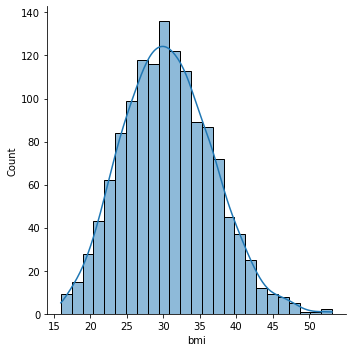

In [168]:
sns.displot(data=df['bmi'], kde=True)

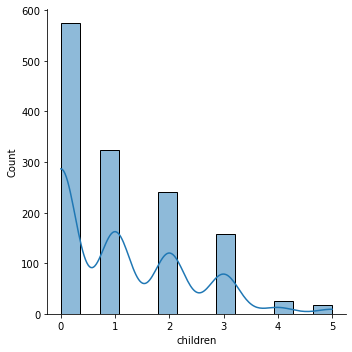

In [169]:
sns.displot(data=df['children'], kde=True)

<AxesSubplot:>

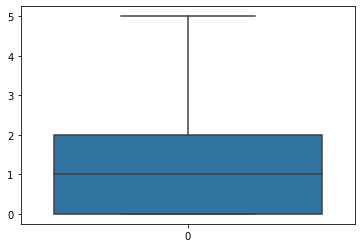

In [170]:
sns.boxplot(data=df['children'])

In [178]:
df.charges.var()

146652372.1528548

# soal 1


7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [171]:
charges_smoker = df[df['smoker'] == 'yes']['charges']

In [172]:
charges_nonsmoker = df[df['smoker'] == 'no']['charges']

In [175]:
charges_smoker.mean()

32050.23183153285

In [176]:
charges_nonsmoker.mean()

8434.268297856199

rata2  charges perokok lebih tinggi dari non perokok 

5. Apakah variansi dari data charges perokok dan non perokok sama?

In [180]:
statistics.variance(charges_smoker)


133207311.20634925

In [181]:
statistics.pstdev(charges_smoker)

11520.466706529432

In [20]:
statistics.variance(charges_nonsmoker)

35925420.49611173

In [183]:
statistics.pstdev(charges_nonsmoker)

5990.964530287611

variansi dari data charges perokok dan non perokok sama berbeda

8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25

In [21]:
charges_nonsmoker_bmiu25 = df[(df['smoker'] == 'yes') & (df['bmi'] > 25)]['charges']

In [22]:
charges_smoker_bmiu25 = df[(df['smoker'] == 'no') & (df['bmi'] > 25)]['charges']

In [23]:
charges_smoker_bmiu25

1        1725.5523
2        4449.4620
4        3866.8552
5        3756.6216
6        8240.5896
           ...    
1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, Length: 872, dtype: float64

In [149]:
charges_nonsmoker_bmiu25.mean()

35116.90965694065

In [150]:
charges_smoker_bmiu25.mean()

8629.589609712148

tagihan perokok dengan bmi diatas 25 lebih dari dari yang tidak merokok.

6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [26]:
age_smoker_female = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]['age']

In [27]:
age_smoker_female.mean()

38.608695652173914

In [28]:
age_smoker_male = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]['age']

In [29]:
age_smoker_male.mean()

38.44654088050314

In [144]:
ztest ,pval = stests.ztest(age_smoker_male, age_smoker_female, value=0,alternative='two-sided')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  -0.0949672035305086
pval =  0.9243408769427405
accept null hypothesis


Berdasarkan uji statistik rata2 umur pria dan wanita yang merokok sama. Hal ini dimaklumi mengingat keduanya memiliki rata2 yang dekat.

9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [30]:
bmi_male = df[df['sex'] == 'male']['bmi']

In [31]:
bmi_female = df[df['sex'] == 'female']['bmi']

In [32]:
bmi_male.mean()

30.943128698224832

In [33]:
bmi_female.mean()

30.377749244713023

In [141]:
bmi_male.median()

30.6875

In [143]:
bmi_female.median()

30.1075

<AxesSubplot:xlabel='bmi', ylabel='sex'>

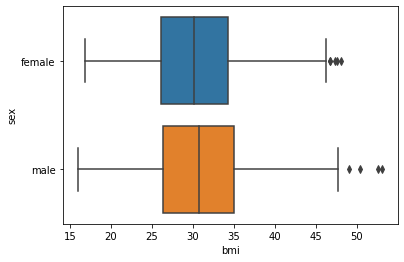

In [34]:
sns.boxplot(data=df, x='bmi', y='sex')

bmi pria lebih tinggi baik dilihat dari median atau mean

10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [35]:
bmi_smoker = df[df['smoker'] == 'yes']['bmi']

In [36]:
bmi_nonsmoker = df[df['smoker'] == 'no']['bmi']

<AxesSubplot:xlabel='bmi', ylabel='smoker'>

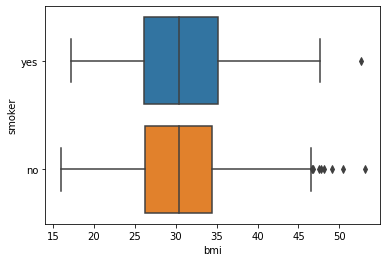

In [37]:

sns.boxplot(data=df, x='bmi', y='smoker')

In [133]:
print(bmi_smoker.mean())
print(bmi_nonsmoker.mean())

30.708448905109503
30.651795112781922


In [134]:
print(bmi_smoker.median())
print(bmi_nonsmoker.median())

30.447499999999998
30.3525


bmi perokok lebih tinggi dari bmi nonperokok dengan berpandingan mean 30.70 : 30.65 dan perbandingan median 30.44 : 30.35



# SOAL 2


sns.boxplot(data=df.charges, hue='region)

2. Distribusi peluang tagihan di tiap-tiap region

<AxesSubplot:xlabel='charges', ylabel='region'>

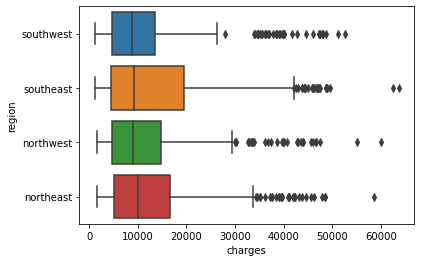

In [40]:
sns.boxplot(data=df, x='charges', y='region')

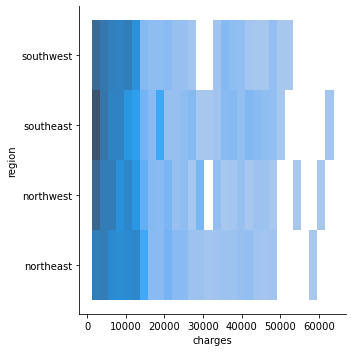

In [130]:
sns.displot(data=df, x='charges', y='region')

<AxesSubplot:xlabel='charges', ylabel='region'>

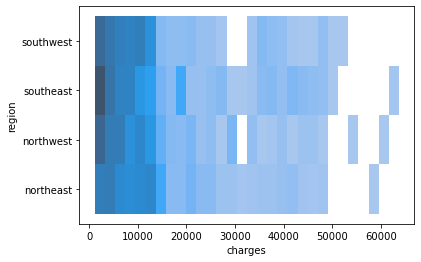

In [131]:
sns.histplot(data=df, x='charges', y='region')

3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [43]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [45]:
region_count = {'southeast':364, 'southwest':325, 'northwest':325, 'northeast':324}

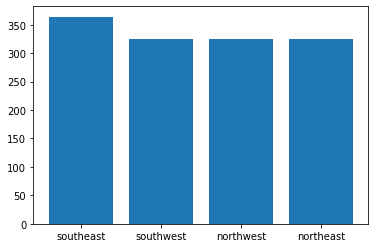

In [46]:
ind = np.arange(len(region_count))

plt.bar(ind, list(region_count.values()))
plt.xticks(ind, list(region_count.keys()))
plt.show()

In [47]:
region_proba = {'southeast':364/1338, 'southwest':325/1338, 'northwest':325/1338, 'northeast':324/1338}

In [48]:
region_proba

{'southeast': 0.27204783258594917,
 'southwest': 0.2428998505231689,
 'northwest': 0.2428998505231689,
 'northeast': 0.242152466367713}

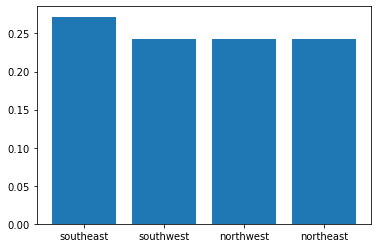

In [49]:
ind = np.arange(len(region_proba))

plt.bar(ind, list(region_proba.values()))
plt.xticks(ind, list(region_proba.keys()))
plt.show()

setiap region memiliki proporsi data banyak orang yang hampir sama


1. Gender mana yang memiliki tagihan paling tinggi?

In [199]:
charges_male = df[df['sex'] == 'male']['charges']

In [200]:
charges_female = df[df['sex'] == 'female']['charges']

In [201]:
print('tagihan pria berdasarkan mean', charges_male.mean())
print('tagihan wanita berdasarkan mean', charges_female.mean())

print('tagihan pria berdasarkan median', charges_male.median())
print('tagihan wanita berdasarkan median', charges_female.median())

tagihan pria berdasarkan mean 13956.751177721886
tagihan wanita berdasarkan mean 12569.57884383534
tagihan pria berdasarkan median 9369.61575
tagihan wanita berdasarkan median 9412.9625


tagihan pria lebih tinggi dari wanita dengan berpandingan mean 13956.75 : 12569.58

sedangkan berdasarkan median tagihan wanita lebih tinggi dari pria dengan berpandingan mean 9369.61 : 9412.9625

untuk melakukan analisa lebih lanjut diperlukan uji statistik yang akan dilakukan di soal nomer 5


4. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [56]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [57]:
smoker_proportion = {'smoker':274, 'non-smoker':1064}

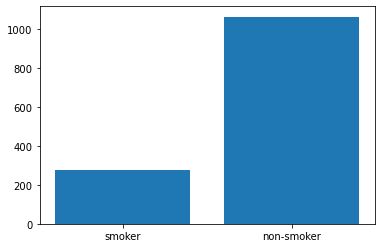

In [187]:

ind = np.arange(len(smoker_proportion))

plt.bar(ind, list(smoker_proportion.values()))
plt.xticks(ind, list(smoker_proportion.keys()))
plt.show()



proporsi non-perokok lebih tinggi dengan berpandingan 1064:274

5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?


In [59]:
smoker_female = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]

In [60]:
len(smoker_female)/len(df[df['smoker'] == 'yes'])

0.4197080291970803

6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [61]:
smoker_male = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]

In [62]:
len(smoker_male)/len(df[df['smoker'] == 'yes'])

0.5802919708029197

# Soal 3

1. Mencari peluang besar tagihan berdasarkan BMI

If your BMI is less than 18.5, it falls within the underweight range.

If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.

If your BMI is 25.0 to 29.9, it falls within the overweight range.

If your BMI is 30.0 or higher, it falls within the obese range.

https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

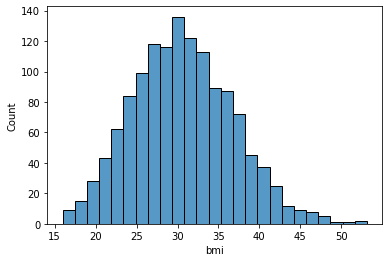

In [64]:
sns.histplot(data = df.bmi)

In [65]:
bmihealthy = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) ]
underweight = df[(df['bmi'] < 18.5)  ]
overweight = df[(df['bmi'] > 24.9) & (df['bmi'] <= 29.9) ]
obese = df[df['bmi'] >29.9]

karena expected value

In [66]:
print(underweight.charges.mean())
print(bmihealthy.charges.mean())
print(overweight.charges.mean())
print(obese.charges.mean())

8852.200585000002
10379.499732162163
11006.80998941842
15491.542238184353


karena ekspektasi dapat dairtian sebagai mean maka dapat kita katakan ekspektasi biaya asuransi meningkat dengan meningkatnya bmi. Untuk analisa lebih jauh kita akan melakukan analisa regresi dibawah.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

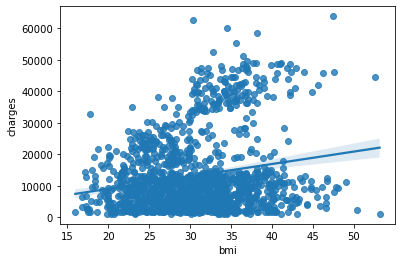

In [67]:
sns.regplot(data =df, x = 'bmi',  y='charges')

Estimated coefficients:
b_0 = 1192.9372089613462            
b_1 = 393.87303079738894


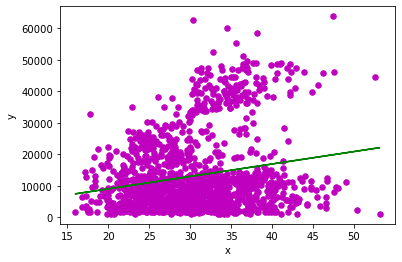

In [68]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = df.bmi
    y = df.charges
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

ketika bmi naik dalam satuannya atau 1 charge akan naik sebanyak 393.87.

link sumber code https://www.geeksforgeeks.org/linear-regression-python-implementation/

3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah
perokok


In [69]:
proba_smoker = 274/(274+1064)

In [70]:
proba_smoker

0.20478325859491778

In [71]:
charges_smoker_more16k = df[(df['charges'] > 16700) & (df['smoker'] == 'yes')]

In [72]:
len(charges_smoker_more16k)

254

In [190]:
smoker = df[df['smoker'] == 'yes']
len(smoker)

274

In [73]:
proba_charges_smoker_more16k = len(charges_smoker_more16k)/1338

In [74]:
proba_smoker

0.20478325859491778

In [75]:
proba_charges_smoker_more16k

0.1898355754857997

In [76]:
print('peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah \
    perokok')

print(proba_charges_smoker_more16k/proba_smoker)

peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah     perokok
0.9270072992700731


In [77]:
254/274

0.927007299270073

peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah     perokok
0.9270072992700731

2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700.

In [78]:
bmimore25_smoker = df[(df['bmi'] > 25) & (df['smoker'] == 'yes')]

In [79]:
len(bmimore25_smoker)

219

In [80]:
bmimore25_smoker_cmore16k = df[(df['bmi'] > 25) & (df['smoker'] == 'yes') & (df['charges'] > 16700)]

In [81]:
len(bmimore25_smoker_cmore16k)

215

In [82]:
len(bmimore25_smoker_cmore16k)/len(bmimore25_smoker)

0.9817351598173516

Kemungkinan  seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700 adalah 98%.

4. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
16.7k

In [83]:
bmimore25 = df[(df['bmi'] > 25)]
bmiless25 = df[(df['bmi'] < 25)]

bmimore25_more16k = df[(df['bmi'] > 25) & (df['charges'] > 16700)]
bmiless25_more16k = df[(df['bmi'] < 25) & (df['charges'] > 16700)]

In [84]:
print(len(bmimore25_more16k)/len(bmimore25))
print(len(bmiless25_more16k)/len(bmiless25))

0.25939505041246563
0.20816326530612245


In [85]:
print((len(bmimore25_more16k)/len(df))/(len(bmimore25)/len(df)))
print((len(bmiless25_more16k)/len(df))/(len(bmiless25)/len(df)))

0.25939505041246563
0.20816326530612245


Kemungkinan a lebih mungkin terjadi dengan perbedaan probabilitas proporsi antara 0.26 dan 0.2 terdapat selisih sekitar 6%.

5. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [86]:
smoker_bmimore25 = df[(df['bmi'] > 25) & (df['smoker'] == 'yes')]
nonsmoker_bmimore25 = df[(df['bmi'] > 25) & (df['smoker'] == 'no')]

smoker_bmimore25_more16k = df[(df['bmi'] > 25) & (df['smoker'] == 'yes') & (df['charges'] > 16700)]
nonsmoker_bmimore25_more16k = df[(df['bmi'] < 25) & (df['smoker'] == 'no') & (df['charges'] > 16700)]

In [87]:
print(len(smoker_bmimore25_more16k)/len(smoker_bmimore25))
print(len(nonsmoker_bmimore25_more16k)/len(nonsmoker_bmimore25))

0.9817351598173516
0.013761467889908258


Kemungkinan a lebih mungkin terjadi dibuktikan dengan probabilitas proporsi yang cukup besar yaitu 0.98 atau 98%.

# soal 4

<AxesSubplot:xlabel='charges', ylabel='smoker'>

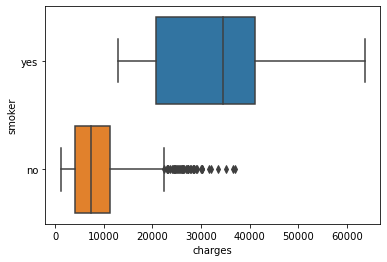

In [88]:
sns.boxplot(data=df, x='charges', y='smoker')

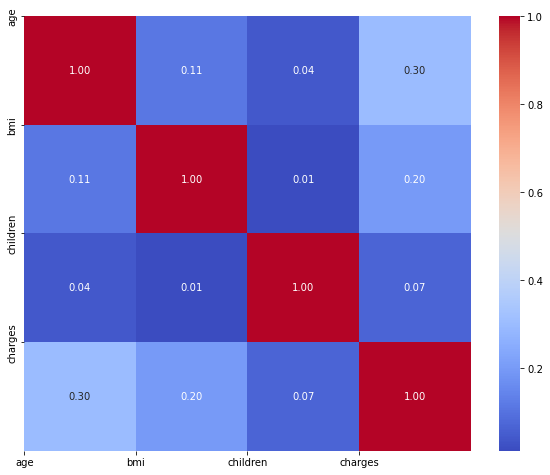

In [89]:
def heatmap_correlation(corr):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()


corr = df.corr()
heatmap_correlation(corr)

      age     sex     bmi  children smoker     region      charges  female  \
0      19  female  27.900         0    yes  southwest  16884.92400       1   
1      18    male  33.770         1     no  southeast   1725.55230       0   
2      28    male  33.000         3     no  southeast   4449.46200       0   
3      33    male  22.705         0     no  northwest  21984.47061       0   
4      32    male  28.880         0     no  northwest   3866.85520       0   
...   ...     ...     ...       ...    ...        ...          ...     ...   
1333   50    male  30.970         3     no  northwest  10600.54830       0   
1334   18  female  31.920         0     no  northeast   2205.98080       1   
1335   18  female  36.850         0     no  southeast   1629.83350       1   
1336   21  female  25.800         0     no  southwest   2007.94500       1   
1337   61  female  29.070         0    yes  northwest  29141.36030       1   

      male  no  yes  northeast  northwest  southeast  southwest

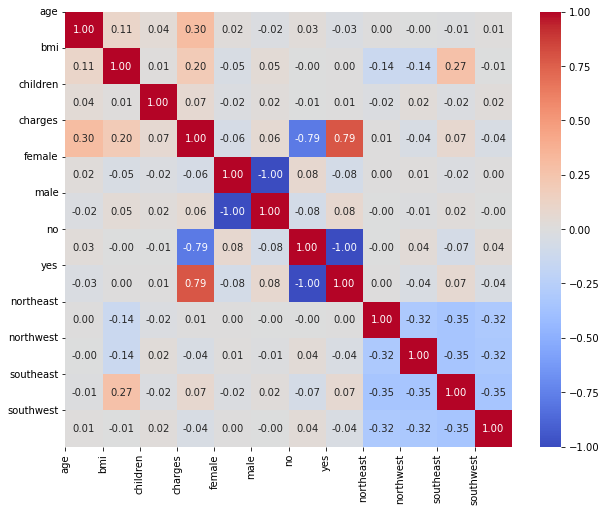

In [90]:
num_df = df[['age','bmi', 'children', 'charges']]

data = df.copy()


data_sex = pd.get_dummies(df['sex'])
data_smoker = pd.get_dummies(df['smoker'])
data_region = pd.get_dummies(df['region'])
data_new = pd.concat([data, data_sex, data_smoker, data_region], axis=1)
print(data_new)

corr = data_new.corr()
heatmap_correlation(corr)

Dapat dilihat terdapat korelasi yang kuat antara variabel meroko atau smoker dengan charges atau tagihan. Hal ini sesuai dengan visualisasi bocplot yang menunjukkan bahwa biaya tagihan peroko lebih besar daripada yang tidak merokok.

Kemudian ada hubungan korelasi yang lemah antara variabel charges dengan variabel age dan variabel charges dengan bmi.

# SOAL 5

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [91]:
charges_smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [92]:
charges_nonsmoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [93]:
from statsmodels.stats import weightstats as stests

𝐻0:𝜇charges_smoker=𝜇charges_nonsmoker
 
𝐻1:𝜇charges_smoker>𝜇charges_nonsmoker

we used z test when n > 30

reject h0 if pvalue < alpha

reject h0 if z-test statistics is more than z-score

The z-score of 0.05 is 1.64.

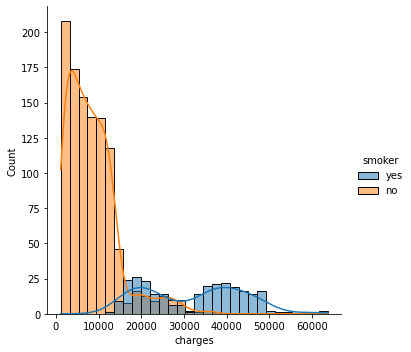

In [94]:
sns.displot(data=df, x='charges', kde=True, hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

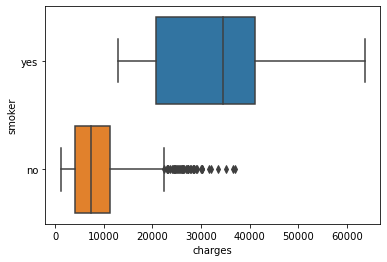

In [95]:
sns.boxplot(data=df, x='charges', y='smoker')

In [198]:
ztest ,pval = stests.ztest(charges_smoker, charges_nonsmoker, value=0,alternative='two-sided')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.025:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  46.66492117272371
pval =  0.0
reject null hypothesis


In [110]:
ztest ,pval = stests.ztest(charges_smoker, charges_nonsmoker, value=0,alternative='larger')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  46.66492117272371
pval =  0.0
reject null hypothesis


Hasil menunjukkan bahwa hiposis 0 atau null hipotesis ditolak. Dapat dismpulkan bahwa biaya asuransi perokok lebih besar dari yang tidak merokok.

2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25

𝐻0:𝜇bmimore25=𝜇bmiless25
 
𝐻1:𝜇bmimore25r>𝜇bmiless25

we used z test when n > 30

reject h0 if pvalue < alpha

reject h0 if z-test statistics is more than z-score

The z-score of 0.05 is 1.64.

In [97]:
bmimore25 = df[df['bmi'] >= 25]['charges']
bmiless25= df[df['bmi'] <= 25]['charges']


In [107]:
ztest ,pval = stests.ztest(bmimore25, bmiless25, value=0,alternative='two-sided')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  4.3160957906153055
pval =  1.5881308375641682e-05
reject null hypothesis


In [156]:
ztest ,pval = stests.ztest(bmimore25, bmiless25, value=0,alternative='larger')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  4.3160957906153055
pval =  7.940654187820841e-06
reject null hypothesis


Hasil menunjukkan bahwa hiposis 0 atau null hipotesis ditolak. Dapat dismpulkan bahwa biaya asuransi orang dengan bmi lebih dari 25 lebih besar dari orang dengan bmi kurang dari 25.

3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [100]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

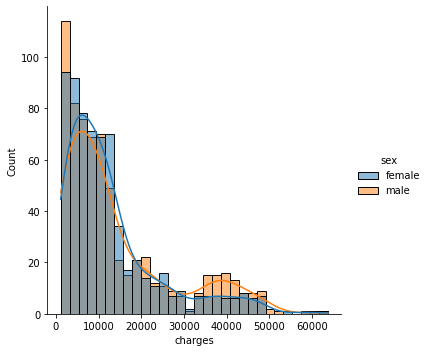

In [203]:
sns.displot(data=df, x='charges', kde=True, hue='sex')

<AxesSubplot:xlabel='charges', ylabel='sex'>

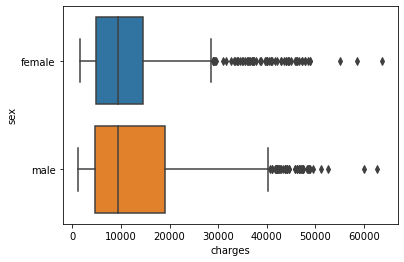

In [204]:
sns.boxplot(data=df, x='charges', y='sex')

𝐻0:𝜇bmimore25=𝜇bmiless25
 
𝐻1:𝜇bmimore25r>𝜇bmiless25

we used z test when n > 30

reject h0 if pvalue < alpha

reject h0 if z-test statistics is more than z-score

The z-score of 0.05 is 1.64.

In [209]:
ztest ,pval = stests.ztest(charges_male, charges_female, value=0,alternative='two-sided')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  2.097546590051688
pval =  0.03594521741682005
reject null hypothesis


In [206]:
ztest ,pval = stests.ztest(charges_male, charges_female, value=0,alternative='larger')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  2.097546590051688
pval =  0.017972608708410026
reject null hypothesis


Hasil menunjukkan bahwa hiposis 0 atau null hipotesis ditolak. Dapat dismpulkan bahwa biaya asuransi pria lebih besar dari wanita.

1. BMI laki-laki dan perempuan sama

<AxesSubplot:xlabel='bmi', ylabel='sex'>

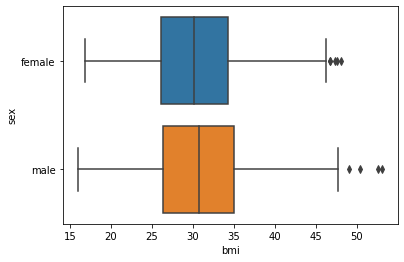

In [111]:
sns.boxplot(df.bmi, y=df.sex)

In [196]:
ztest ,pval = stests.ztest(bmi_male, bmi_female, value=0,alternative='smaller')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  1.6967526357522242
pval =  0.9551282816002804
accept null hypothesis


Hasil menunjukkan bahwa hiposis 0 atau null hipotesis diterima. Dapat disimpulkan bahwa bmi pria sama dengan wanita.

In [153]:
ztest ,pval = stests.ztest(bmi_male, bmi_female, value=0,alternative='two-sided')
print('ztest = ', ztest)
print('pval = ', pval)
if pval<0.025:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

ztest =  1.6967526357522242
pval =  0.08974343679943912
accept null hypothesis
